## HEART DISEASE PREDICTION CAPSTONE PROJECT

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

#Set visualization style
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data Analysis (EDA)

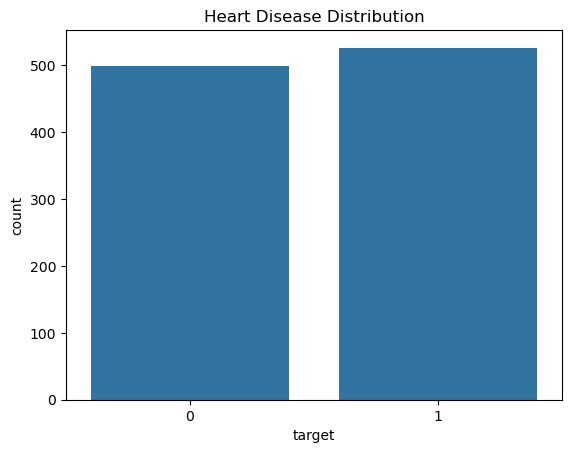

In [16]:
#to check for target variable balance

sns.countplot(x='target' , data=df)
plt.title('Heart Disease Distribution')
plt.show()

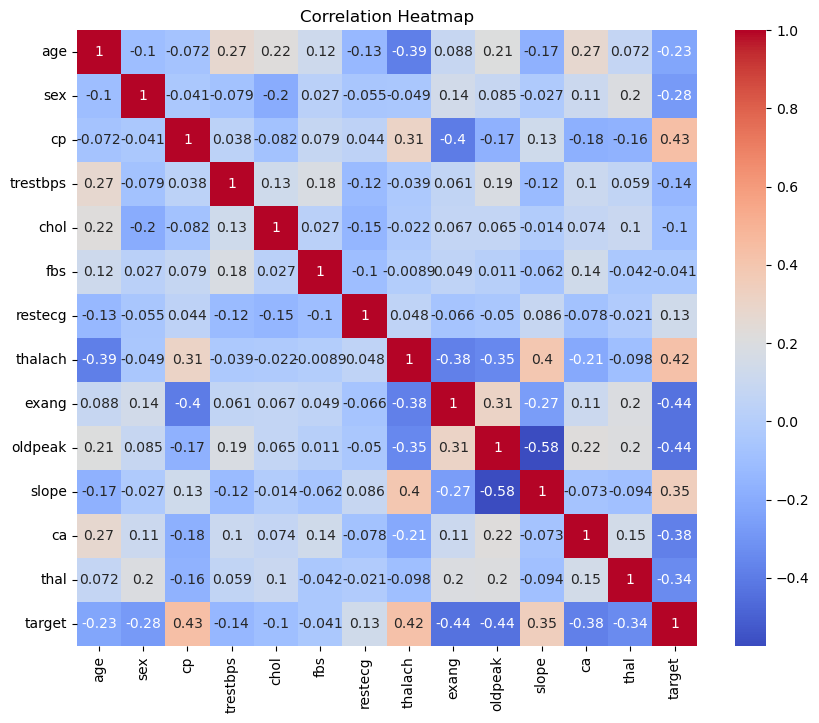

In [20]:
#checking for correlations

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

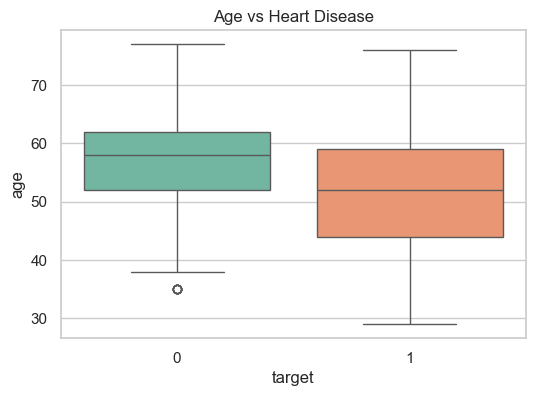

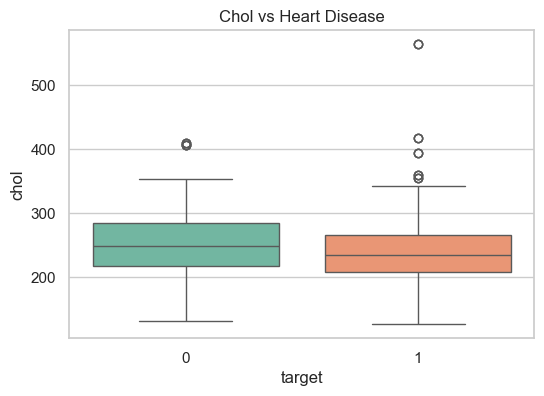

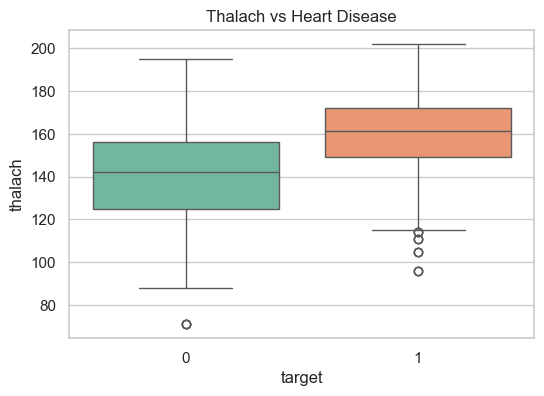

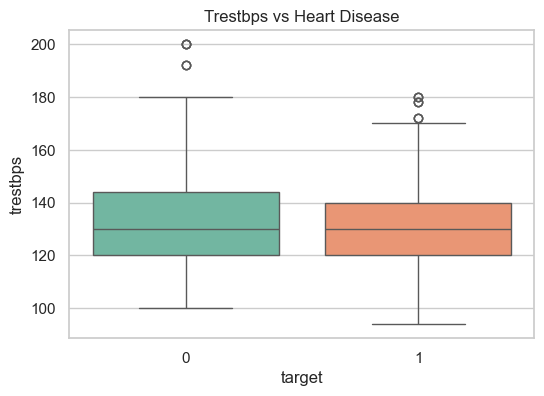

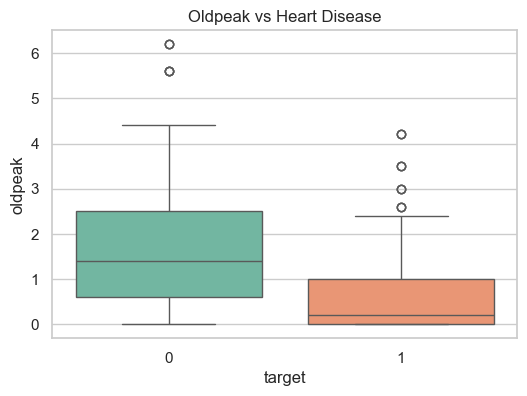

In [66]:
##Boxplots of key continuous features

features = ['age',  'chol', 'thalach', 'trestbps', 'oldpeak']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=feature, hue='target', data=df, palette='Set2', legend=False)
    plt.title(f'{feature.capitalize()} vs Heart Disease')
    plt.show()

## Data Preprocessing

In [25]:
#Separate features and target

X = df.drop('target', axis=1)
y = df['target']

In [31]:
#Scale numerical values for better model performance

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
print("\n Data split complete:")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


 Data split complete:
Training samples: 820
Testing samples: 205


## Build and Compare Models

In [46]:
models = {
    "Logistics Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()

}

results = {}

In [48]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n {name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


 Logistics Regression Accuracy: 0.7951
[[73 29]
 [13 90]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


 Decision Tree Accuracy: 0.9854
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


 Random Forest Accuracy: 0.9854
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accurac

## Comparing the Model Performance

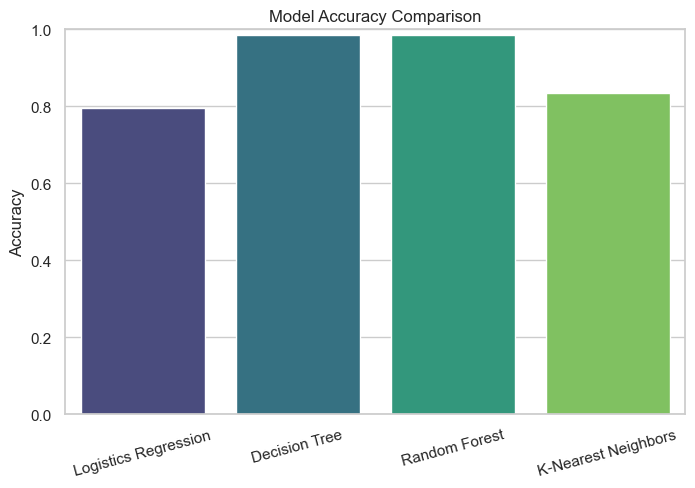

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

## Final Model (To select the best)

In [54]:
best_model_name = max(results, key=results.get)
print(f"\n Best Model: {best_model_name} with accuracy {results[best_model_name]:.2f}")


 Best Model: Decision Tree with accuracy 0.99


In [56]:
# Retrain the best model on full dataset for deployment

final_model = models[best_model_name]
final_model.fit(X_scaled, y)

DecisionTreeClassifier(random_state=42)

## Predicting on a new sample

In [78]:
#Example patient data (in same feature order as dataset)

sample_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])
sample_scaled = scaler.transform(sample_data)
prediction = final_model.predict(sample_scaled)

if prediction[0] == 1:
    print("\n This patient is likely to have heart disease.")
else:
    print("\n This patient is unlikely to have heart disease.")


 This patient is likely to have heart disease.


## Conclusion

In [64]:
print("""
Project Summary:
-Conducted EDA to identify key risk factors (age, cholesterol, chest pain type,
-Built multiple classification models
-Compared their performance and selected the best
-The best model can be used to predict heart disease risk early
""")


Project Summary:
-Conducted EDA to identify key risk factors (age, cholesterol, chest pain type,
-Built multiple classification models
-Compared their performance and selected the best
-The best model can be used to predict heart disease risk early

